## What is the problem that we are trying to solve?
- Model to predict a house price given some known parameters of the house.
What will we get by solving the problem?
- Given certain features , how can we approximately predict the correct current house price in a given locality.
What will be the insights we can gain by solving the problem?
- Customers can check the market price with agent quotation
What are the features that will be help us in this problem journey?
- Predict a house price => No of bed rooms, square feet area of the house ,% lower status of the population,nitric oxides concentration,proportion of non-retail business acres per town etc
How to go about the process of building a model

## Flow of solving a problem
- Get the dataset
- Data Munging: manual way of cleaning and wrangling : Data wrangling is the tool( built lib pandas etc) oriented process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time
-EDA (Exploratory data analysis)
- Visualising of data
-Training the model
-Comparing the model
- Selecting the model

Linear regression 
Machine learning , supervised
*model is built, predict value of a depenednt variable using 
the values of one or more indepenedent varaibles
*straight line when we plot y = mx+c

Housing price prediction
*Model that is going to predict the price of teh house
price :- dependent variable
CRM, ZN, RM , LSTAT :- independent variables
    
plot : straight line y = m1x1+m2x2+m3x3+...+c
    x1, x2, x3 ,...., xn = independent variables
    m1, m2, ...mn = weights
    c = constant called weight

## Useful libraries for analytics

- pandas - To work with solid data-structures, n-dimensional matrices and perform exploratory data analysis. 
- matplotlib - To visualize data using 2D plots. 
- seaborn - To make 2D plots look pretty and readable.
- scikit-learn - To create machine learning models easily and make predictions.
#kaggle(website)

In [95]:
## Get the dataset
import pandas as pd
from sklearn.datasets import load_boston
pd.options.display.float_format = '{:,.2f}'.format

dataset = load_boston()
type(dataset)

sklearn.utils.Bunch

In [96]:
## Data cleaning 
## Data munging  and data wrangling
df = pd.DataFrame(dataset.data)
print("[INFO] df type : {}".format(type(df)))
print("[INFO] df shape: {}".format(df.shape))
print(df.head())

[INFO] df type : <class 'pandas.core.frame.DataFrame'>
[INFO] df shape: (506, 13)
    0     1    2    3    4    5     6    7    8      9     10     11   12
0 0.01 18.00 2.31 0.00 0.54 6.58 65.20 4.09 1.00 296.00 15.30 396.90 4.98
1 0.03  0.00 7.07 0.00 0.47 6.42 78.90 4.97 2.00 242.00 17.80 396.90 9.14
2 0.03  0.00 7.07 0.00 0.47 7.18 61.10 4.97 2.00 242.00 17.80 392.83 4.03
3 0.03  0.00 2.18 0.00 0.46 7.00 45.80 6.06 3.00 222.00 18.70 394.63 2.94
4 0.07  0.00 2.18 0.00 0.46 7.15 54.20 6.06 3.00 222.00 18.70 396.90 5.33


In [97]:
print("[INFO] keys : {}".format(dataset.keys()))

[INFO] keys : dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [98]:
print("[INFO] features shape : {}".format(dataset.data.shape))
print("[INFO] target shape   : {}".format(dataset.target.shape))

[INFO] features shape : (506, 13)
[INFO] target shape   : (506,)


In [99]:
print("[INFO] feature names")
print(dataset.feature_names)

[INFO] feature names
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [100]:
print("[INFO] dataset summary")
print(dataset.DESCR)

[INFO] dataset summary
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,00

In [101]:
## Analyse the data
df = pd.DataFrame(dataset.data)
print("[INFO] df type : {}".format(type(df)))
print("[INFO] df shape: {}".format(df.shape))
print(df.head())

[INFO] df type : <class 'pandas.core.frame.DataFrame'>
[INFO] df shape: (506, 13)
    0     1    2    3    4    5     6    7    8      9     10     11   12
0 0.01 18.00 2.31 0.00 0.54 6.58 65.20 4.09 1.00 296.00 15.30 396.90 4.98
1 0.03  0.00 7.07 0.00 0.47 6.42 78.90 4.97 2.00 242.00 17.80 396.90 9.14
2 0.03  0.00 7.07 0.00 0.47 7.18 61.10 4.97 2.00 242.00 17.80 392.83 4.03
3 0.03  0.00 2.18 0.00 0.46 7.00 45.80 6.06 3.00 222.00 18.70 394.63 2.94
4 0.07  0.00 2.18 0.00 0.46 7.15 54.20 6.06 3.00 222.00 18.70 396.90 5.33


In [102]:
df.columns = dataset.feature_names
print(df.head())

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  


In [103]:
df["PRICE"] = dataset.target
print(df.head())

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  PRICE  
0   4.98  24.00  
1   9.14  21.60  
2   4.03  34.70  
3   2.94  33.40  
4   5.33  36.20  


In [104]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


In [105]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [106]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [107]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [108]:
df.min()

CRIM        0.01
ZN          0.00
INDUS       0.46
CHAS        0.00
NOX         0.39
RM          3.56
AGE         2.90
DIS         1.13
RAD         1.00
TAX       187.00
PTRATIO    12.60
B           0.32
LSTAT       1.73
PRICE       5.00
dtype: float64

In [109]:
df.corr(method="pearson")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt 

# More information on usage of seaborn to help you 

https://www.datacamp.com/community/tutorials/seaborn-python-tutorial?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332602034361&utm_targetid=aud-390929969673:dsa-473406580275&utm_loc_interest_ms=&utm_loc_physical_ms=9062010&gclid=Cj0KCQjw19DlBRCSARIsAOnfRegJXLNU5w49VkvuUjBxIM1zRtrhlKpvNRNJkGzQO1PziQgRFHW45foaAlHkEALw_wcB#figsize



In [111]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [112]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    Set aesthetic parameters in one step.
    
    Each set of parameters can be set directly or temporarily, see the
    referenced functions below for more information.
    
    Parameters
    ----------
    context : string or dict
        Plotting context parameters, see :func:`plotting_context`
    style : string or dict
        Axes style parameters, see :func:`axes_style`
    palette : string or sequence
        Color palette, see :func:`color_palette`
    font : string
        Font family, see matplotlib font manager.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    color_codes : bool
        If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
        color codes (e.g. "b", "g", "r", etc.) to the colors from this pale

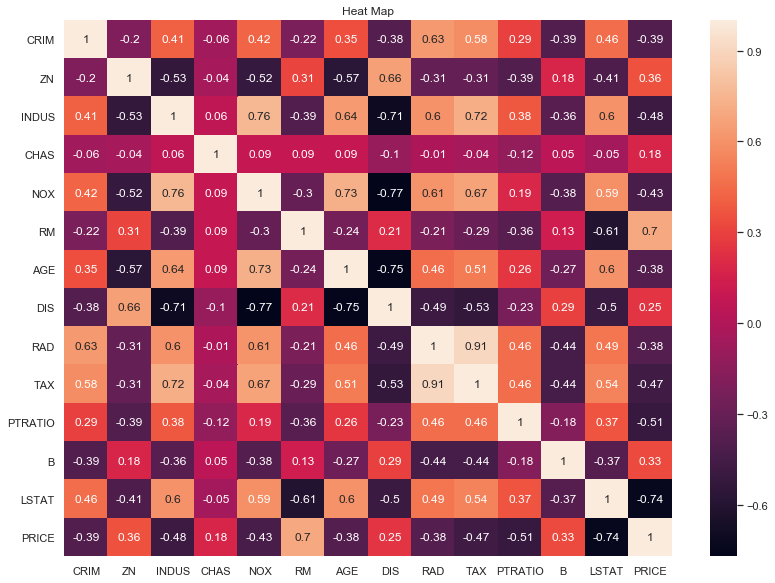

In [113]:
sns.heatmap(data = df.corr().round(2),annot=True)
plt.title("Heat Map")
plt.tight_layout() 
plt.show()

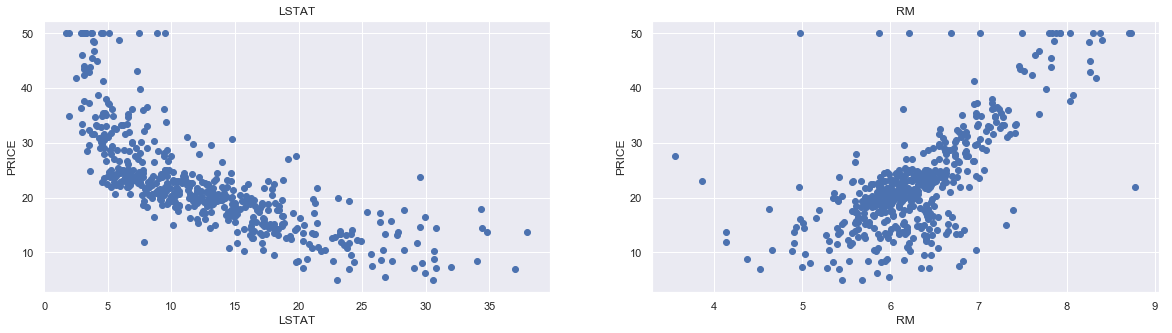

In [114]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

In [115]:
import numpy as np

# Observations: 
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.<br/>
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.<br/>

In [116]:
#Preparing the data for training the model
X = pd.DataFrame(df['LSTAT'])
X['RM'] = pd.Series(df['RM'])
# or X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['PRICE']

In [117]:
X.head(5)

,LSTAT,RM
0,4.98,6.58
1,9.14,6.42
2,4.03,7.18
3,2.94,7.00
4,5.33,7.15


In [118]:
X.shape

(506, 2)

# Splitting Data into training and test

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Building Linear Regression model

In [120]:
import sklearn
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# model evaluation for training set

In [121]:
y_train_predict = lin_model.predict(X_train)


# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

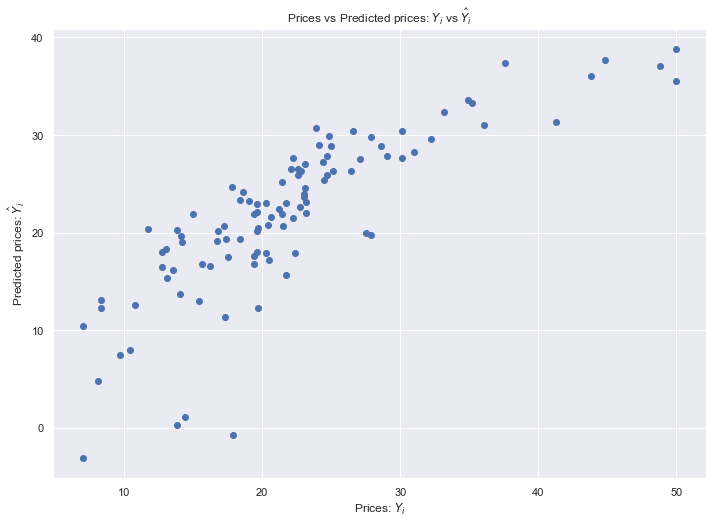

In [122]:
plt.scatter(Y_test, y_test_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Other ways of finding the accuracy of the model are the RMSE and R2 score which we recommend that you get more details about and use in your projects

WEBINAR RECORDING LINK : https://vmware.zoom.us/recording/share/a31sMWUKlw0WyEClRk3szNxKgULKPKzFexFuP_JRGvqwIumekTziMw